In [1]:
#change working directory
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/notebooks'

In [2]:
#set the current directory
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory.")

You set a new current directory.


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/CAPSTONE_PROJ_TEST'

In [4]:
#import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

In [5]:
#load dataset
df = pd.read_csv("data/processed/cancer_patient_data_cleaned.csv")

In [6]:
df.head(2000)

,Unnamed: 0,Patient ID,Country,Age,Gender,Cancer Type,Cancer Stage,Diagnosis Date,Treatment Start Date,Treatment End Date,...,Healthcare System,Recurrence,Clinical Trial Participation,Comorbidities,Quality of Life Score,BMI_Category,IsGender,IsRecurrence,AgeGroup,IsClinical_Trial_Participation
0,0,PT00001,Finland,89,Male,Breast,III,2015-08-10,2015-09-20,2016-09-07,...,NHS,Yes,Yes,Diabetes,5,Obese,0,1,90,1
1,1,PT00006,Sweden,28,Male,Pancreatic,IV,2019-03-06,2019-05-16,2020-03-23,...,Private Insurance,No,No,Obesity,6,Normal weight,0,0,20,0
2,2,PT00007,Finland,50,Female,Leukemia,I,2016-05-21,2016-09-14,2017-03-27,...,Private Insurance,Yes,No,Cardiovascular Disease,7,Overweight,1,1,40,0
3,3,PT00010,Spain,77,Female,Ovarian,I,2013-07-22,2013-11-08,2014-11-04,...,Statutory Health Insurance,No,No,Hypertension,7,Obese,1,0,80,0
4,4,PT00011,Spain,22,Female,Pancreatic,II,2012-12-27,2013-06-06,2013-12-27,...,NHS,No,No,Unknown,2,Normal weight,1,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,PT03810,Austria,50,Male,Pancreatic,IV,2013-05-07,2013-10-25,2014-07-25,...,Private Insurance,No,No,Cardiovascular Disease,2,Obese,0,0,40,0
1996,1996,PT03811,Norway,60,Female,Pancreatic,I,2022-05-29,2022-07-02,2022-11-11,...,NHS,No,No,Unknown,6,Obese,1,0,60,0
1997,1997,PT03812,Denmark,55,Female,Colorectal,II,2016-03-14,2016-06-24,2016-08-24,...,Statutory Health Insurance,Yes,No,Obesity,5,Normal weight,1,1,50,0
1998,1998,PT03815,Norway,84,Female,Prostate,III,2012-03-02,2012-04-22,2012-06-30,...,Private Insurance,No,No,Hypertension,4,Normal weight,1,0,90,0


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Patient ID', axis=1)
#df = df.drop('Country', axis=1)

In [8]:
# Encode to 1,2,3,4 for the collumn 'Cancer Stage'
df['Cancer Stage'] = df['Cancer Stage'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date    Treatment Type  \
0              2015-09-20         2016-09-07  Targeted Therapy   
1              

In [9]:
#convert columns to datetime
df[['Treatment Start Date','Treatment End Date']] = df[['Treatment Start Date','Treatment End Date']].apply(pd.to_datetime)

#calculate difference between dates
df['Treatment_length'] = (df['Treatment End Date'] - df['Treatment Start Date']) / np.timedelta64(1, 'D')

#view updated DataFrame
print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date    Treatment Type  \
0              2015-09-20         2016-09-07  Targeted Therapy   
1              

In [11]:
#df.drop(['Diagnosis Date', 'Treatment Start Date', 'Treatment End Date'], axis=1, inplace=True)

In [10]:
# Get the unique values of 'B' column
unique_values = df['Treatment Type'].unique()
print(unique_values)

['Targeted Therapy' 'Immunotherapy' 'Chemotherapy' 'Radiation' 'Surgery']


In [11]:
# Encode to 1,2,3,4 for the collumn 'Cancer Stage'
df['Treatment Type'] = df['Treatment Type'].map({'Targeted Therapy': 1, 'Immunotherapy': 2, 'Chemotherapy': 3, 'Radiation': 4, 'Surgery': 5})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type Survival Status  \
0              2015-09-20         2016-09-07               1       

In [12]:
# Get the unique values of 'B' column
unique_values = df['Survival Status'].unique()
print(unique_values)

['Alive' 'Unknown' 'Deceased' 'Lost to Follow-up']


In [13]:
# Encode to 1,2,3,4 for the collumn 'Survival Status'
df['Survival Status'] = df['Survival Status'].map({'Alive': 1, 'Deceased': 2, 'Lost to Follow-up': 3, 'Unknown': 4})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [14]:
# Get the unique values of 'Genetic Markers' column
unique_values = df['Genetic Markers'].unique()
print(unique_values)

['Unknown' 'KRAS' 'EGFR' 'BRCA1']


In [15]:
# Encode to 1,2,3,4 for the collumn 'Genetic Markers'
df['Genetic Markers'] = df['Genetic Markers'].map({'KRAS': 1, 'EGFR': 2, 'BRCA1': 3, 'Unknown': 4})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [16]:
# Get the unique values of 'Family History' column
unique_values = df['Family History'].unique()
print(unique_values)

['Yes' 'No' 'Unknown']


In [17]:
# Get the unique values of 'Alcohol Consumption' column
unique_values = df['Alcohol Consumption'].unique()
print(unique_values)

['Moderate' 'Unknown' 'Heavy']


In [18]:
# Get the unique values of 'Smoking Status' column
unique_values = df['Smoking Status'].unique()
print(unique_values)

['Current' 'Former' 'Never' 'Unknown']


In [19]:
# Encode to 1,2,3 for the collumn 'Alcohol Consumption'
df['Alcohol Consumption'] = df['Alcohol Consumption'].map({'Moderate': 1, 'Heavy': 2, 'Unknown': 3})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [20]:
# Encode to 1,2,3 for the collumn 'Smoking Status' 'Current' 'Former' 'Never' 'Unknown'
df['Smoking Status'] = df['Smoking Status'].map({'Current': 1, 'Former': 2, 'Never': 3, 'Unknown': 4})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [21]:
# Encode to 0,1,2 for the collumn 'Family History'
df['Family History'] = df['Family History'].map({'No': 0, 'Yes': 1, 'Unknown': 2})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [24]:
#df.drop(['Recurrence', 'Clinical Trial Participation'], axis=1, inplace=True)

In [22]:
# Get the unique values of 'Urban vs. Rural' column
unique_values = df['Urban vs. Rural'].unique()
print(unique_values)

['Urban' 'Rural']


In [23]:
# Get the unique values of 'Healthcare System' column
unique_values = df['Healthcare System'].unique()
print(unique_values)

['NHS' 'Private Insurance' 'Statutory Health Insurance']


In [24]:
# Encode to 1,2 for the collumn 'Urban vs. Rural'
df['Urban vs. Rural'] = df['Urban vs. Rural'].map({'Urban': 1, 'Rural': 2})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [25]:
# Encode to 1,2,3 for the collumn 'Healthcare System''NHS' 'Private Insurance' 'Statutory Health Insurance'
df['Healthcare System'] = df['Healthcare System'].map({'NHS': 1, 'Private Insurance': 2, 'Statutory Health Insurance': 3})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [26]:
# Get the unique values of 'Comorbidities' column
unique_values = df['Comorbidities'].unique()
print(unique_values)

['Diabetes' 'Obesity' 'Cardiovascular Disease' 'Hypertension' 'Unknown']


In [27]:
# Encode to 1,2,3,4,5 for the collumn 'Comorbidities'
df['Comorbidities'] = df['Comorbidities'].map({'Diabetes': 1, 'Obesity': 2, 'Cardiovascular Disease': 3, 'Hypertension': 4, 'Unknown': 5})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [28]:
# Get the unique values of 'BMI_Category' column
unique_values = df['BMI_Category'].unique()
print(unique_values)

['Obese' 'Normal weight' 'Overweight' 'Underweight']


In [29]:
# Encode to 1,2,3,4 for the collumn 'BMI_Category'
df['BMI_Category'] = df['BMI_Category'].map({'Obese': 1, 'Normal weight': 2, 'Overweight': 3, 'Underweight': 4})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [30]:
# Get the unique values of 'Cancer Type' column
unique_values = df['Cancer Type'].unique()
print(unique_values)

['Breast' 'Pancreatic' 'Leukemia' 'Ovarian' 'Colorectal' 'Prostate' 'Lung']


In [31]:
# Encode to 1,2,3,4,5,6,7 for the collumn 'Cancer Type'
df['IsCancerType'] = df['Cancer Type'].map({'Breast': 1, 'Pancreatic': 2, 'Leukemia': 3, 'Ovarian': 4, 
                                            'Colorectal': 5, 'Prostate': 6, 'Lung': 7})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [32]:
# Get the unique values of 'Country' column
unique_values = df['Country'].unique()
print(unique_values)

['Finland' 'Sweden' 'Spain' 'Norway' 'Germany' 'Ireland' 'Austria'
 'Denmark' 'Portugal' 'Netherlands' 'Poland' 'Italy' 'Switzerland'
 'Belgium' 'France']


In [33]:
# Encode to 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15 for the collumn 'Country'
df['IsCountry'] = df['Country'].map({'Finland': 1, 'Sweden': 2, 'Spain': 3, 'Norway': 4, 
                                            'Germany': 5, 'Ireland': 6, 'Austria': 7, 'Denmark': 8,
                                            'Portugal': 9, 'Netherlands': 10, 'Poland': 11, 'Italy': 12,
                                            'Switzerland': 13, 'Belgium': 14, 'France': 15})

print(df)

      Country  Age  Gender Cancer Type  Cancer Stage Diagnosis Date  \
0     Finland   89    Male      Breast             3     2015-08-10   
1      Sweden   28    Male  Pancreatic             4     2019-03-06   
2     Finland   50  Female    Leukemia             1     2016-05-21   
3       Spain   77  Female     Ovarian             1     2013-07-22   
4       Spain   22  Female  Pancreatic             2     2012-12-27   
...       ...  ...     ...         ...           ...            ...   
5184  Ireland   57    Male        Lung             1     2016-03-28   
5185   Norway   89  Female      Breast             1     2020-11-12   
5186  Denmark   43    Male  Colorectal             1     2010-05-30   
5187  Belgium   36    Male      Breast             3     2013-02-06   
5188  Ireland   21    Male  Pancreatic             1     2014-12-27   

     Treatment Start Date Treatment End Date  Treatment Type  Survival Status  \
0              2015-09-20         2016-09-07               1      

In [34]:
#checking the collumn datatypes
df.dtypes

Country                                   object
Age                                        int64
Gender                                    object
Cancer Type                               object
Cancer Stage                               int64
Diagnosis Date                            object
Treatment Start Date              datetime64[ns]
Treatment End Date                datetime64[ns]
Treatment Type                             int64
Survival Status                            int64
Survival Duration (Months)                 int64
Genetic Markers                            int64
Family History                             int64
Smoking Status                             int64
Alcohol Consumption                        int64
BMI                                      float64
Urban vs. Rural                            int64
Healthcare System                          int64
Recurrence                                object
Clinical Trial Participation              object
Comorbidities       

In [51]:
df.to_csv(f'data/processed/cancer_patient_data_preprocess.csv')

In [37]:
# remove 'Age', 'Survival Duration (Months)', 'diff_days', 'Quality of Life Score', 'IsGender'
df_sub = df[['Age', 'Cancer Stage', 'Treatment Type', 'Survival Status', 'Survival Duration (Months)',
             'Genetic Markers', 'Family History', 'Smoking Status', 'Alcohol Consumption', 'Urban vs. Rural',
            'Healthcare System', 'Comorbidities', 'Quality of Life Score', 'BMI_Category', 'IsGender', 'IsRecurrence',
            'IsClinical_Trial_Participation', 'Treatment_length', 'IsCancerType', 'IsCountry']]
df_sub

,Age,Cancer Stage,Treatment Type,Survival Status,Survival Duration (Months),Genetic Markers,Family History,Smoking Status,Alcohol Consumption,Urban vs. Rural,Healthcare System,Comorbidities,Quality of Life Score,BMI_Category,IsGender,IsRecurrence,IsClinical_Trial_Participation,Treatment_length,IsCancerType,IsCountry
0,89,3,1,1,31,4,1,1,1,1,1,1,5,1,0,1,1,353.0,1,1
1,28,4,1,1,79,1,0,2,3,1,2,2,6,2,0,0,0,312.0,2,2
2,50,1,2,1,6,4,1,3,1,1,2,3,7,3,1,1,0,194.0,3,1
3,77,1,3,1,74,1,0,4,3,2,3,4,7,1,1,0,0,361.0,4,3
4,22,2,3,1,6,4,0,4,2,1,1,5,2,2,1,0,0,204.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,57,1,5,2,62,3,1,2,3,1,2,5,7,2,0,1,1,234.0,7,6
5185,89,1,2,4,25,2,1,3,3,2,1,5,1,2,1,1,0,31.0,1,4
5186,43,1,5,1,119,4,0,2,1,2,1,2,1,2,0,0,0,286.0,5,8
5187,36,3,3,1,20,1,1,1,1,1,2,4,1,2,0,0,0,293.0,1,14


<Figure size 1000x700 with 0 Axes>

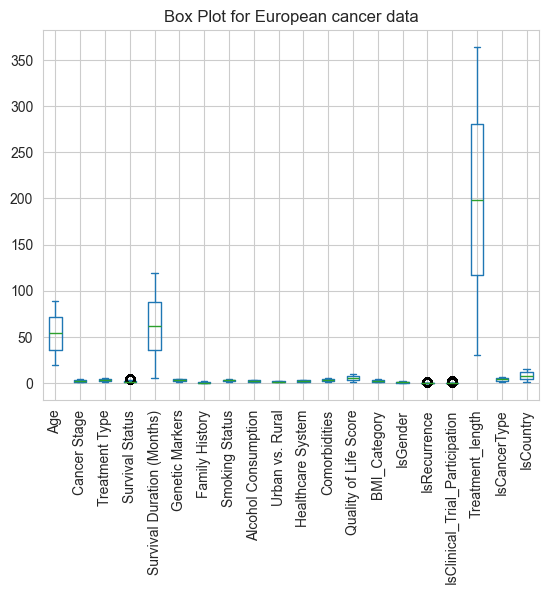

In [38]:

# Create a box plot for all features to visualise outliers
plt.figure(figsize=(10, 7))
df_sub.plot(kind='box', y=['Age', 'Cancer Stage', 'Treatment Type', 'Survival Status', 'Survival Duration (Months)',
             'Genetic Markers', 'Family History', 'Smoking Status', 'Alcohol Consumption', 'Urban vs. Rural',
            'Healthcare System', 'Comorbidities', 'Quality of Life Score', 'BMI_Category', 'IsGender', 'IsRecurrence',
            'IsClinical_Trial_Participation', 'Treatment_length', 'IsCancerType', 'IsCountry'], rot=90)
plt.title('Box Plot for European cancer data')
plt.show()

In [43]:
# Get the unique values of 'Genetic Markers' column
unique_values = df['Genetic Markers'].unique()
print(unique_values)

[4 1 2 3]


In [48]:
#remove 'Unkown (encoded as 4) from Genetic Markers collumn'
df_new_remove_outliers = df_sub[df_sub['Genetic Markers'] != 4].dropna()

In [49]:
# Get the unique values of 'Genetic Markers' column
unique_values = df_sub['Genetic Markers'].unique()
print(unique_values)

[4 1 2 3]


In [50]:
df_new_remove_outliers

,IsCancerType,Cancer Stage,Treatment Type,Survival Status,Genetic Markers,Smoking Status,Alcohol Consumption,Urban vs. Rural,Healthcare System,Comorbidities,BMI_Category
1,2,4,1,1,1,2,3,1,2,2,2
3,4,1,3,1,1,4,3,2,3,4,1
6,1,1,4,2,1,3,3,1,2,4,1
9,6,4,3,1,2,2,3,1,2,2,1
13,3,2,1,1,3,3,1,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5183,1,4,1,1,2,2,3,1,3,5,3
5184,7,1,5,2,3,2,3,1,2,5,2
5185,1,1,2,4,2,3,3,2,1,5,2
5187,1,3,3,1,1,1,1,1,2,4,2


In [53]:
#remove 'Unkown (encoded as 4) from Survival Status collumn'
df_new_remove_outliers = df_sub[df_sub['Survival Status'] != 4].dropna()

<Figure size 1000x700 with 0 Axes>

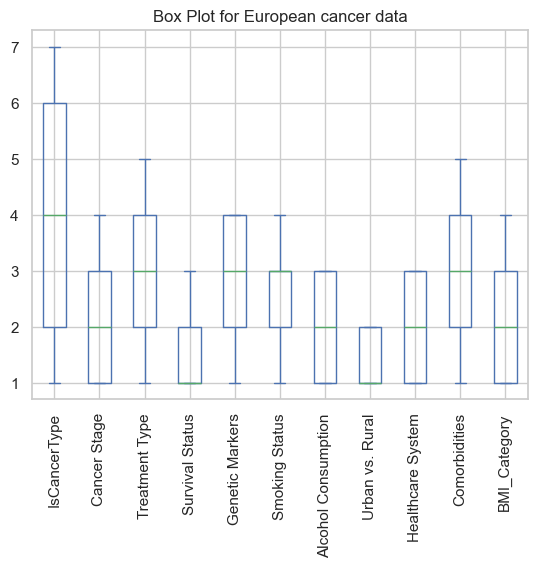

In [54]:
# Create a box plot for all features to visualise outliers
plt.figure(figsize=(10, 7))
df_new_remove_outliers.plot(kind='box', y=['IsCancerType', 'Cancer Stage', 'Treatment Type', 'Survival Status', 
             'Genetic Markers', 'Smoking Status', 'Alcohol Consumption', 'Urban vs. Rural',
            'Healthcare System', 'Comorbidities', 'BMI_Category'], rot=90)
plt.title('Box Plot for European cancer data')
plt.show()

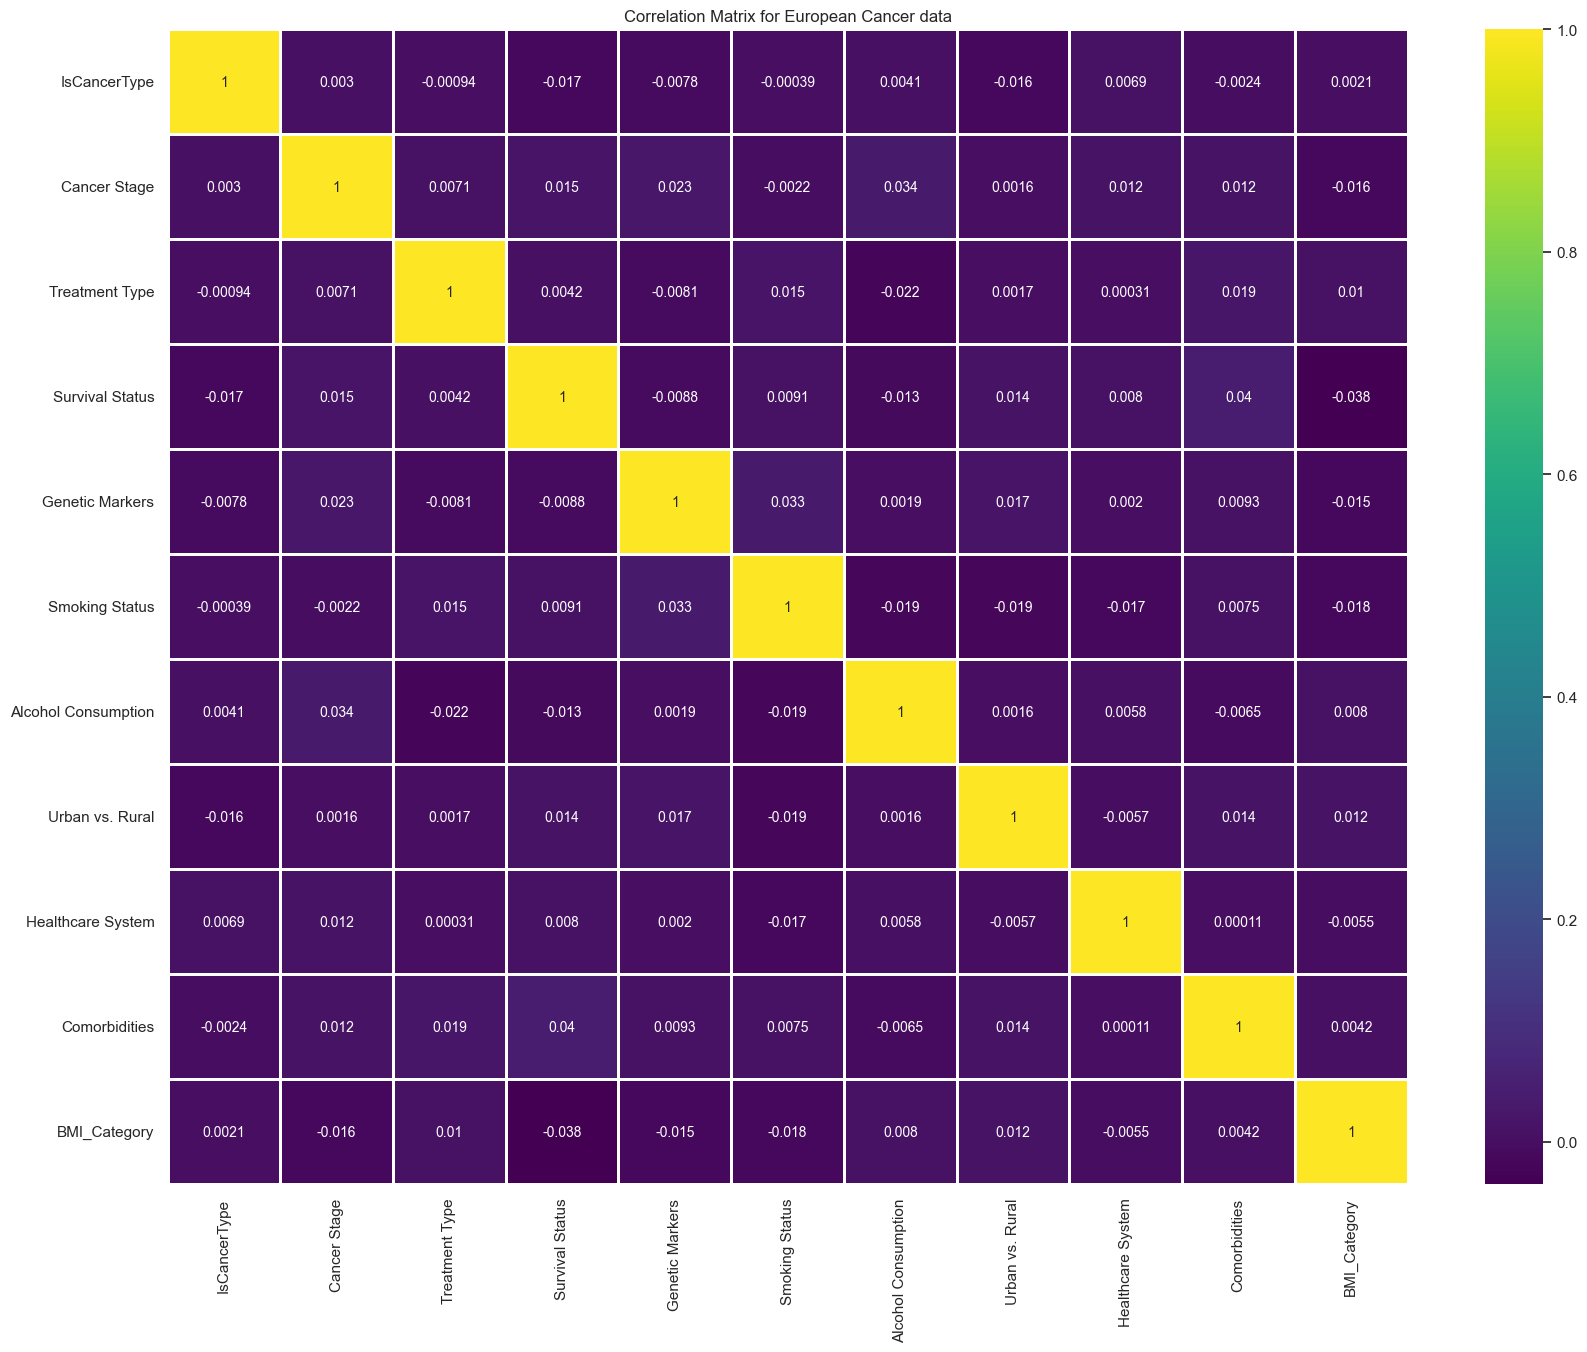

In [55]:
#heatmap for correlation matrix
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,15))
df_corr = df_new_remove_outliers.corr()
sns.heatmap(data=df_corr, annot=True, linewidths=1.0, annot_kws={"size": 10},cmap='viridis')
plt.title('Correlation Matrix for European Cancer data')
plt.show()

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5189.0,54.440933,20.272560,20.0,36.0,54.0,72.0,89.0
Cancer Stage,5189.0,2.263056,1.048545,1.0,1.0,2.0,3.0,4.0
Treatment Type,5189.0,2.985546,1.417747,1.0,2.0,3.0,4.0,5.0
Survival Status,5189.0,0.486221,0.805755,0.0,0.0,0.0,1.0,3.0
Survival Duration (Months),5189.0,62.627481,31.446461,6.0,36.0,62.0,88.0,119.0
Genetic Markers,5189.0,2.549239,1.131203,1.0,2.0,3.0,4.0,4.0
Family History,5189.0,0.476971,0.588783,0.0,0.0,0.0,1.0,2.0
Smoking Status,5189.0,2.375795,0.860466,1.0,2.0,3.0,3.0,4.0
Alcohol Consumption,5189.0,1.950472,0.950416,1.0,1.0,2.0,3.0,3.0
BMI,5189.0,29.069397,6.240444,18.0,23.7,29.1,34.3,40.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df.drop(['Survival Status'],axis=1),
                                    df['Survival Status'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)

* Train set: (4151, 21) (4151,) 
* Test set: (1038, 21) (1038,)


In [ ]:
from sklearn.pipeline import Pipeline

### Data Cleaning and Feature Engineering
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OrdinalEncoder

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
'''
['Age','Cancer Stage', 'Treatment Type','Survival Duration (Months)', 'Genetic Markers',
                                                'Family History', 'Smoking Status', 'Alcohol Consumption', 'BMI', 'Urban vs. Rural',
                                                'Healthcare System', 'Comorbidities', 'Quality of Life Score', 'BMI_Category',
                                                'IsGender','IsRecurrence', 'AgeGroup',
                                                'IsClinical_Trial_Participation', 'diff_days']
'''

In [ ]:
def PipelineOptimization(model):
  pipeline_base = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['Age','Cancer Stage', 'Treatment Type','Survival Duration (Months)', 'Genetic Markers',
                                                'Family History', 'Smoking Status', 'Alcohol Consumption',
                                                'Comorbidities', 'Quality of Life Score', 'BMI_Category',
                                                'IsGender','IsRecurrence',
                                                'IsClinical_Trial_Participation', 'diff_days']) ),

      ( 'categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                        variables=['Gender']) ),

      ( "ordinal",OrdinalEncoder(encoding_method='arbitrary', 
                                 variables = ['Cancer Type', 'Gender']) ), 

      ("feat_scaling", StandardScaler() ),

      ("feat_selection",  SelectFromModel(model) ),

      ("model", model ),


    ])

  return pipeline_base


In [ ]:
from sklearn.model_selection import GridSearchCV
class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches

In [ ]:
models_search = {
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier":RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier":ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=0),
}

In [ ]:
params_search = {
    "DecisionTreeClassifier":{},
    "RandomForestClassifier":{"model__n_estimators":[50,20],
                               "model__max_depth":[None,3,10]},
    "GradientBoostingClassifier":{},
    "ExtraTreesClassifier":{},
    "AdaBoostClassifier":{},
}

In [ ]:
params_search = {
    "DecisionTreeClassifier":{},
    "RandomForestClassifier":{},
    "GradientBoostingClassifier":{},
    "ExtraTreesClassifier":{},
    "AdaBoostClassifier":{},
}

In [ ]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='accuracy',
           n_jobs=-1, # use all processors, but one
           cv=2)


Running GridSearchCV for DecisionTreeClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for RandomForestClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for GradientBoostingClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for ExtraTreesClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for AdaBoostClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [ ]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
4,AdaBoostClassifier,0.662169,0.66225,0.662331,0.000081
3,ExtraTreesClassifier,0.651252,0.654301,0.657349,0.003048
1,RandomForestClassifier,0.652048,0.652614,0.653179,0.000565
2,GradientBoostingClassifier,0.648193,0.648759,0.649326,0.000566
0,DecisionTreeClassifier,0.507707,0.51289,0.518072,0.005183


Classification Report:

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       681
           1       0.00      0.00      0.00       255
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        57

    accuracy                           0.66      1038
   macro avg       0.16      0.25      0.20      1038
weighted avg       0.43      0.66      0.52      1038



/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

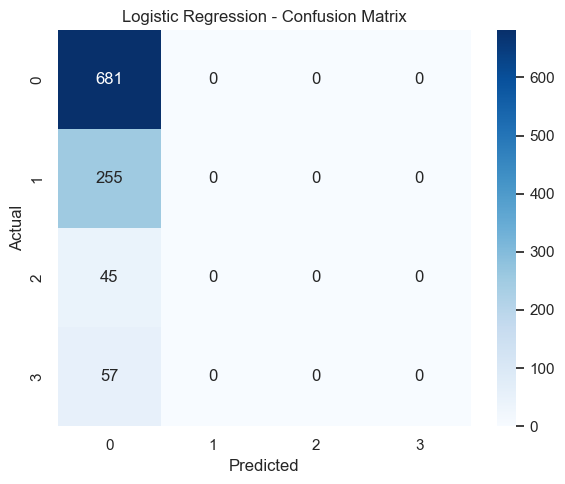

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/processed/cancer_patient_data_preprocess.csv")

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Country', 'Gender', 'Cancer Type', 'AgeGroup'])

# Encode target variable
le = LabelEncoder()
df['Survival Status'] = le.fit_transform(df['Survival Status'])

# Define features and target
X = df.drop(columns=['Survival Status'])
y = df['Survival Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       681
           1       0.00      0.00      0.00       255
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        57

    accuracy                           0.66      1038
   macro avg       0.16      0.25      0.20      1038
weighted avg       0.43      0.66      0.52      1038



/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

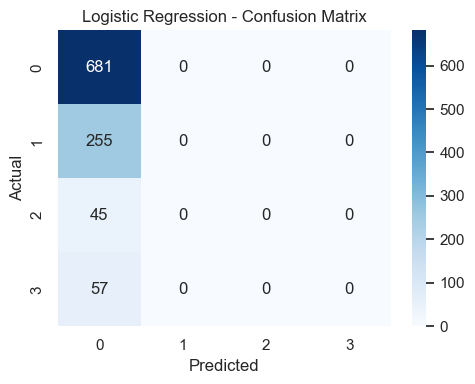


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       681
           1       0.00      0.00      0.00       255
           2       0.75      0.13      0.23        45
           3       0.00      0.00      0.00        57

    accuracy                           0.66      1038
   macro avg       0.35      0.28      0.26      1038
weighted avg       0.47      0.66      0.53      1038



/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

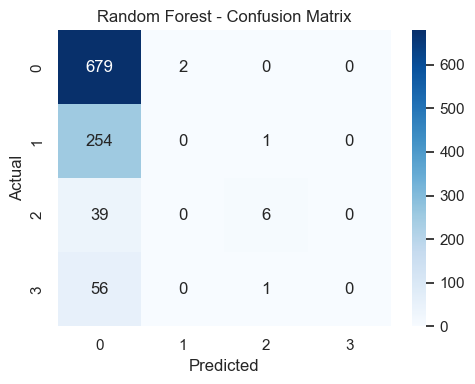


Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       681
           1       0.19      0.01      0.02       255
           2       0.40      0.64      0.49        45
           3       0.00      0.00      0.00        57

    accuracy                           0.65      1038
   macro avg       0.32      0.40      0.33      1038
weighted avg       0.51      0.65      0.54      1038



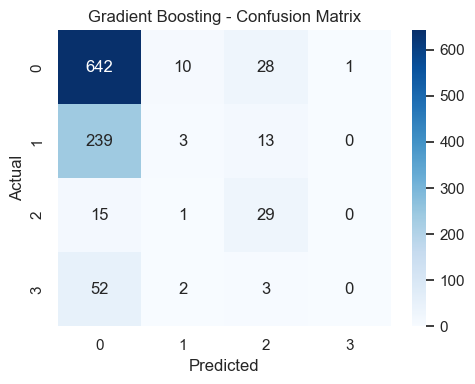


Extra Trees - Classification Report
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       681
           1       0.14      0.00      0.01       255
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        57

    accuracy                           0.65      1038
   macro avg       0.20      0.25      0.20      1038
weighted avg       0.47      0.65      0.52      1038



/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

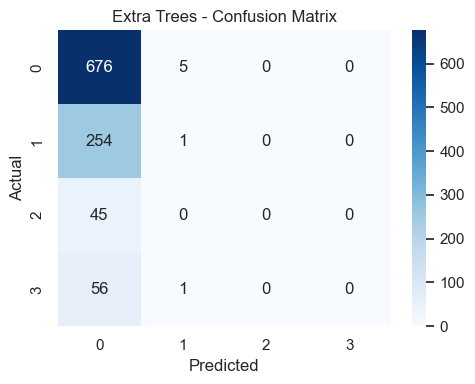


AdaBoost - Classification Report
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       681
           1       0.00      0.00      0.00       255
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        57

    accuracy                           0.66      1038
   macro avg       0.16      0.25      0.20      1038
weighted avg       0.43      0.66      0.52      1038



/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

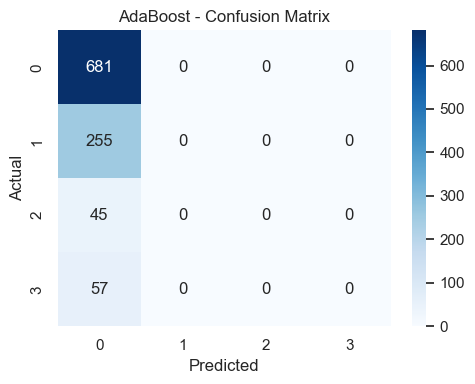


Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       681
           1       0.23      0.24      0.24       255
           2       0.27      0.36      0.31        45
           3       0.06      0.05      0.06        57

    accuracy                           0.50      1038
   macro avg       0.31      0.32      0.31      1038
weighted avg       0.51      0.50      0.50      1038



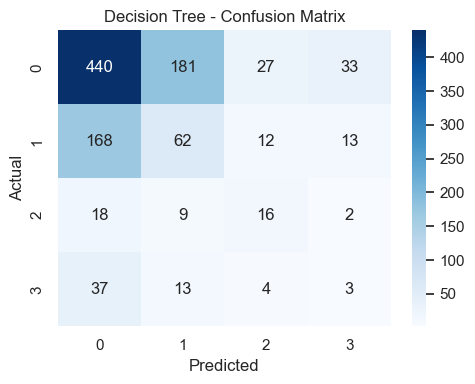

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/processed/cancer_patient_data_preprocess.csv")

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Country', 'Gender', 'Cancer Type', 'AgeGroup'])

# Encode target variable
le = LabelEncoder()
df['Survival Status'] = le.fit_transform(df['Survival Status'])

# Define features and target
X = df.drop(columns=['Survival Status'])
y = df['Survival Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifiers to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
